# ***STRESS LYSIS***

***ABOUT THE DATA & THE NOTEBOOK***

**Based on the human’s physical activity, the stress levels of the human being are detected and analyzed. A dataset of 2001 samples is provided for human body humidity, body temperature and the number of steps taken by the user. Three different classifications of stress are analyzed such as low stress, normal stress, and high stress.** 

**In this notebook, I've analyzed the features of the dataset, trained the model and finally deployed it too.**

**HIT THE UPVOTE 🔼**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# File - Stress_Lysis.ipynb

# ***IMPORTS***

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/content/drive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Getting started.pdf
/content/drive/MyDrive/Composer-Setup.exe
/content/drive/MyDrive/keshara.pdf
/content/drive/MyDrive/New folder.zip
/content/drive/MyDrive/triangle-pos.zip
/content/drive/MyDrive/22_23-J-33 /22_23-J-33.mp4
/content/drive/MyDrive/dataset/Screenshot_20230128_085504.png
/content/drive/MyDrive/dataset/Screenshot_20230128_085516.png
/content/drive/MyDrive/dataset/Screenshot_20230128_085523.png
/content/drive/MyDrive/dataset/Screenshot_20230128_085529.png
/content/drive/MyDrive/dataset/Screenshot_20230128_085533.png
/content/drive/MyDrive/dataset/Screenshot_20230128_085539.png
/content/drive/MyDrive/dataset/Screenshot_20230128_085544.png
/content/drive/MyDrive/dataset/Screenshot_20230128_085549.png
/content/drive/MyDrive/dataset/Screenshot_20230128_085554.png
/content/drive/MyDrive/dataset/Screenshot_20230128_085601.png
/content/drive/MyDrive/dataset/Screenshot_20230128_085606.png
/content/drive/MyDrive/dataset/Screenshot_20230128_085614.png
/content

# ***DATA COLLECTION***

* ***Reading the Data Files***

In [4]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stress-Lysis (1).csv')
data.head()  # displays the first five rows of the dataframe

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


# ***ANALYZING THE DATA***

In [5]:
data.shape  # returns a tuple of array dimension that specifies the number of rows and columns

(2001, 4)

In [6]:
data.info()  # prints the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [7]:
data.describe()  # returns the statistical summary of the data

,Humidity,Temperature,Step_count,Stress_Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


# ***DATA CLEANING***

***STEPS:***

***1. Analyze the numerical and categorical features, and convert categorical feature into numerical.***

Stress Level
0 - Low stress
1 - Normal stress
2 - High Stress

In [8]:
data['Stress_Level'].unique()

array([1, 2, 0])

***2. Check for missing values and handle them.***

In [9]:
data.isnull().sum()

Humidity        0
Temperature     0
Step_count      0
Stress_Level    0
dtype: int64

***3.Check for duplicate values***

In [10]:
data.duplicated().sum()

0

# ***EDA - EXPLORATORY DATA ANALYSIS***

***1.Univariate Non-Graphical***

***Check for outliers. If present try to handle them.***

In [11]:
data.skew()

Humidity        1.179993e-18
Temperature    -1.297993e-17
Step_count     -6.998237e-03
Stress_Level   -1.811032e-01
dtype: float64

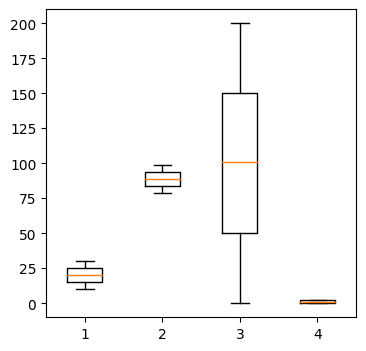

In [12]:
plt.figure(figsize=(4,4))
plt.boxplot(data)
plt.show()

All 4 columns consists skewness.

***Skewness Reduction***

In [13]:
# Logarithmic Transformation
hum_log = np.log(data['Humidity'])
h = round(hum_log.skew(),10)
print(h)

-0.3790364332


In [14]:
# SquareRoot Transformation
temp_sqrt = np.sqrt(data['Temperature'])
temp_sqrt.skew()
t = round(temp_sqrt.skew(),10)
print(t)

-0.0390881104


In [15]:
quantile1=data["Step_count"].quantile(0.25)
quantile2=data["Step_count"].quantile(0.75)

In [16]:
quantile1

50.0

In [17]:
quantile2

150.0

In [18]:
data["Step_count"]=np.where(data["Step_count"]<quantile1,quantile1,data["Step_count"])
data["Step_count"]=np.where(data["Step_count"]>quantile2,quantile2,data["Step_count"])

In [19]:
s = round(data['Step_count'].skew(),10)
print(s)

-0.0094975784


In [20]:
# SquareRoot Transformation
stress_sqrt = np.sqrt(data['Stress_Level'])
sl = round(stress_sqrt.skew(),10)
print(sl)

-0.7944935599


***2.Univariate Graphical***

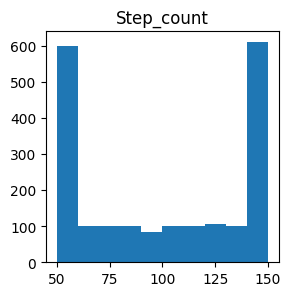

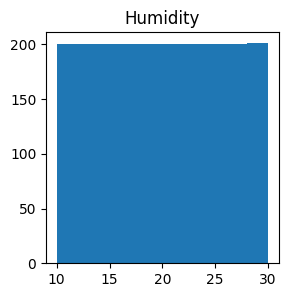

In [21]:
column=['Step_count','Humidity']
for category in column:
    plt.figure(figsize=(3,3))
    plt.hist(data[category])
    plt.title(category)
    plt.show()

<Axes: xlabel='Stress_Level', ylabel='Count'>

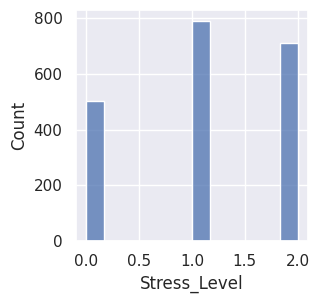

In [22]:
# histplot (categorical) 
plt.figure(figsize=(3,3))
sns.set(font_scale=1)
sns.histplot(data=data, x='Stress_Level')

<Axes: >

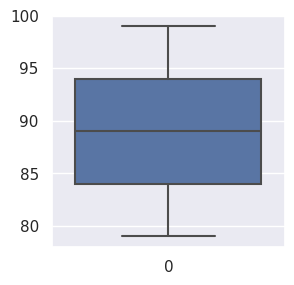

In [23]:
plt.figure(figsize=(3,3))
sns.boxplot(data['Temperature'])

***3.Multivariate Non-Graphical***

***Correlation***

In [24]:
correlation = data.corr()
correlation

,Humidity,Temperature,Step_count,Stress_Level
Humidity,1.000000,1.000000,0.902053,0.936036
Temperature,1.000000,1.000000,0.902053,0.936036
Step_count,0.902053,0.902053,1.000000,0.859096
Stress_Level,0.936036,0.936036,0.859096,1.000000


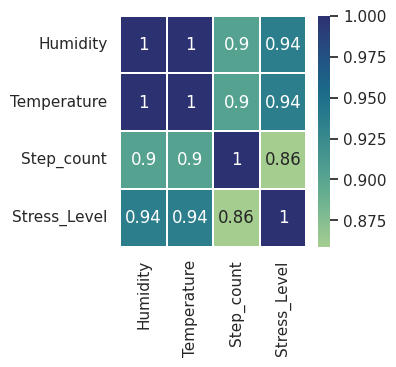

In [25]:
plt.figure(figsize=(3,3))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

***4.Multivariate Graphical***

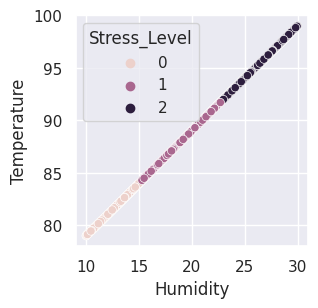

In [26]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='Humidity',y='Temperature',hue='Stress_Level',data=data)
plt.show()

# ***MODELLING***

In [27]:
from sklearn.model_selection import train_test_split
X=data.drop(['Stress_Level'],axis=1)
y=data['Stress_Level']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

***LOGISTIC REGRESSION***

In [28]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(C=1.0,random_state=2)
regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
prediction = regressor.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

[[ 83   0   0]
 [  0 166   0]
 [  0   0 152]]


In [30]:
print(accuracy_score(y_test,prediction))

1.0


***RANDOM FOREST CLASSIFICATION***

In [31]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
model.fit(X,y)
prediction = model.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

[[ 83   0   0]
 [  0 166   0]
 [  0   0 152]]


In [32]:
print(accuracy_score(y_test,prediction))

1.0


***SUPPORT VECTOR MACHINE***

In [34]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.transform(X_test)  # you probably meant X_test here, not X_train again


In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [36]:
y_predict= classifier.predict(X_test)
score=accuracy_score(y_test,y_predict)
print(score)

0.9950124688279302


# ***DEPLOYMENT***

***SAVING THE TRAINED MODEL***

In [37]:
import pickle

In [38]:
filename = 'stress_trained.sav'
pickle.dump(classifier,open(filename,'wb'))

***LOADING THE TRAINED MODEL***

In [39]:
loaded_model = pickle.load(open('stress_trained.sav','rb'))
# Download the stress_trained.sav model 

In [43]:
# Evaluating

input_data = (11.05,80.05,14) #300
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")
    
input_data = (21.38,90.38,128) #100
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")
    
input_data = (25.41,94.41,167) #200
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")

[2]
Stress Level: HIGH
[2]
Stress Level: HIGH
[2]
Stress Level: HIGH


In [44]:
# File - Predictive System.py

# Imports
import numpy as np
import pickle

# Loading the trained model
loaded_model = pickle.load(open('stress_trained.sav','rb'))
# stress_trained.sav - replace the path of the file along with the file name
# Example: loaded_model = pickle.load(open('C:/Users/jeyasri/Downloads/PROJECT/stress_trained.sav','rb'))



input_data = (25.41,94.41,167) #200
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = loaded_model.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")

[2]
Stress Level: HIGH


In [45]:
# Trying to install streamlit
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [46]:
import numpy as np
import pickle
import streamlit as st  

# Loading the trained model
loaded_model = pickle.load(open('stress_trained.sav','rb'))
# Replace path over stress_trained.sav

def stresslevel_prediction(input_data):
    
    #changing the input data into numpy array
    id_np_array = np.asarray(input_data)
    id_reshaped = id_np_array.reshape(1,-1)

    prediction = loaded_model.predict(id_reshaped)
    print(prediction)

    if(prediction[0]==0):
        return "Stress Level: LOW"
    elif(prediction[0]==1):
        return "Stress Level: MEDIUM"
    else:
        return "Stress Level: HIGH"
    
def main():
    
    st.title('STRESS LEVEL PREDICTION WEB APP')
    
    Humidity = st.text_input('Humidity Value')
    Temperature = st.text_input('Body Temperature')
    Step_count = st.text_input('Number of Steps')
    
    # Prediction code
    diagnosis = ''
    
    if st.button('PREDICT'):
        diagnosis = stresslevel_prediction([Humidity, Temperature, Step_count])
        
    st.success(diagnosis)
    
if __name__=='__main__':
    main()

2023-05-24 09:35:31.838 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


**Go to command prompt open the terminal and execute the command.**

streamlit run "path of the file.py"

Example: streamlit run "C:\Users\jeyasri\Downloads\PROJECT\Stress Level Prediction Web App.py"

**Your final result will be like this...**

![Stress.png](attachment:dacc60b2-6304-4afe-b1ca-1ed750052edd.png)